In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras.backend.tensorflow_backend as K
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)



C:\Users\leesoojin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(set(y_train))
print(len(set(y_train)))

(60000, 28, 28)
(10000, 28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10


In [4]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255   #255로 나누는 것은 rescale이다.
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255   #255로 나누는 것은 rescale이다.

y_train = np_utils.to_categorical(y_train, len(set(y_train)))
y_test = np_utils.to_categorical(y_test, len(set(y_test)))

print(y_train.shape)

(60000, 10)


In [5]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model_dir = './model/'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    modelpath = model_dir+'mnist_mlp.model'
    
    checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10)
    
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=200, callbacks=[early_stop, checkpointer])
    

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 38us/step - loss: 0.3380 - acc: 0.9053 - val_loss: 0.1679 - val_acc: 0.9533

Epoch 00001: val_loss improved from inf to 0.16794, saving model to ./model/mnist_mlp.model
Epoch 2/30
48000/48000 [==============================] - 1s 23us/step - loss: 0.1425 - acc: 0.9596 - val_loss: 0.1223 - val_acc: 0.9658

Epoch 00002: val_loss improved from 0.16794 to 0.12235, saving model to ./model/mnist_mlp.model
Epoch 3/30
48000/48000 [==============================] - 1s 22us/step - loss: 0.0955 - acc: 0.9726 - val_loss: 0.1063 - val_acc: 0.9687

Epoch 00003: val_loss improved from 0.12235 to 0.10634, saving model to ./model/mnist_mlp.model
Epoch 4/30
48000/48000 [==============================] - 1s 22us/step - loss: 0.0711 - acc: 0.9798 - val_loss: 0.0899 - val_acc: 0.9727

Epoch 00004: val_loss improved from 0.10634 to 0.08994, saving model to ./model/mnist_mlp.model
Epoch 5/30
48000/4

In [6]:
print("모델 정확도 : %.4f" % model.evaluate(X_test, y_test)[1])

10000/10000 [==============================] - 0s 30us/step
모델 정확도 : 0.9835


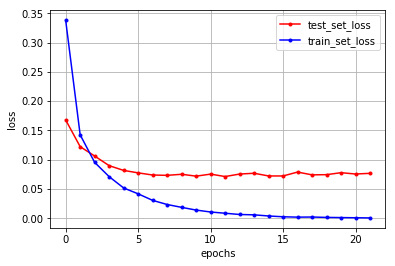

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='test_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.show()